Notebook for cleaning data for the imdb data set

In [2]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load data
name_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\name_basics.csv")
title_akas = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_akas.csv")
title_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_basics.csv")

In [4]:
#check data types to make sure they're in the correct format for analysis
name_basics.dtypes


nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

In [5]:
title_akas.dtypes


title_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

In [6]:
title_basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

From these data sets, we are most interested in the tart year and run time values which are in float64 data type 
which allows for quantitative analysis. Next we'll take a look at what our data sets look like in general. 

In [7]:
# get a better idea of what the data looks like using .head()

title_basics.head()
#title_akas.head()
#name_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


It appears there are missing values under NaN but just how many ? Below we will see how man values in each column for each data set. 

In [8]:
#title_basics.isnull().sum()
#title_akas.isnull().sum()
#name_basics.isnull().sum()

In [12]:
So there looks to be a lot of NaN or missing values but values with a NaN value are ignored from operations like sum, count, etc.
so for gaining insights using viusalizations or summary statistics we can leave them as they will not be counted. 

SyntaxError: invalid syntax (<ipython-input-12-17fa7e83876c>, line 1)

In [13]:
One of the simplest ways to get a quick idea of what your data looks like, we can use the .describe() method. This will 
return a list of descriptive statistics.

SyntaxError: invalid syntax (<ipython-input-13-f973dc1fe5a2>, line 1)

In [14]:
#using the .describe() method
title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


To look for outliers visually in the run time and start year columns, a handy visualization is the boxplot. The box whiskers
are the range and the box covers the interquartile range (75th, 50th/median, and 25th percentiles). The individual dots are
outliers. 

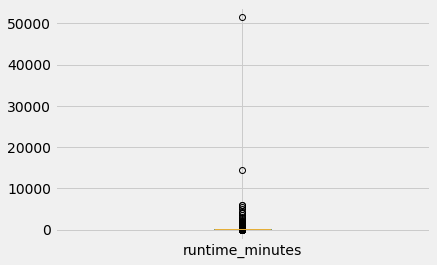

In [15]:
title_basics.boxplot(column = ['runtime_minutes'])

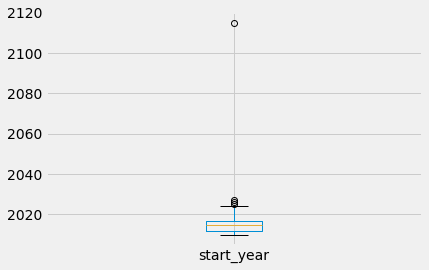

In [16]:
title_basics.boxplot(column = ['start_year'])

From visual and quantitative inspection it appears that both of these columns have outliers as marked by the individual dots in the boxplots showing some unrealistic values for both run time and sart year. hint: it is 2020 currently. So lets adjust these data set values to a more reasonable range and then inspect the distribution again. 

In [17]:
indextime = title_basics[title_basics['runtime_minutes'] >= 200].index

In [18]:
title_basics.drop(indextime , inplace=True)

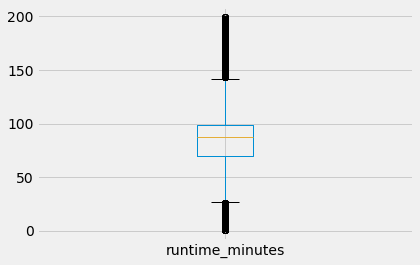

In [19]:
title_basics.boxplot(column = ['runtime_minutes'])

In [20]:
indexyear = title_basics[title_basics['start_year'] >= 2020].index

In [21]:
title_basics.drop(indexyear , inplace=True)

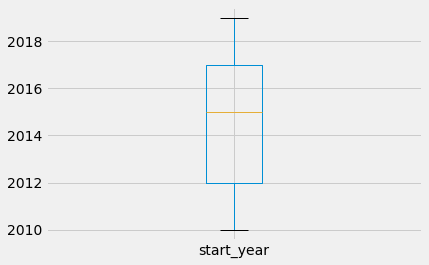

In [22]:
title_basics.boxplot(column = ['start_year'])

C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rafav\Documents\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


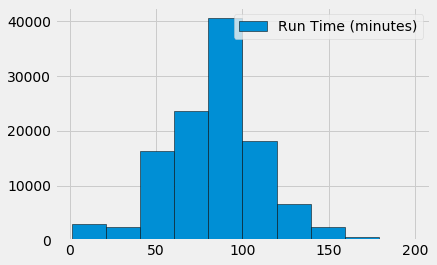

In [23]:
plt.style.use('fivethirtyeight')
plt.hist(title_basics['runtime_minutes'], edgecolor = 'black', label = 'Run Time (minutes)')
plt.legend()

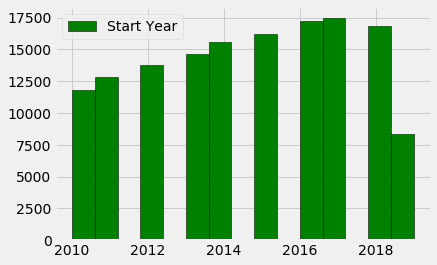

In [24]:
plt.style.use('fivethirtyeight')
plt.hist(title_basics['start_year'], color = 'green', edgecolor = 'black', label = 'Start Year' , bins = 15)
plt.legend()

Now that we have 'run time' and 'start year' cleaned, it would be nice to see if these have any impact with other features such as ratings. 

In [11]:
title_ratings = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_ratings.csv")
